<a href="https://colab.research.google.com/github/yeoncw1226/2024_2_dataScienceProject_team5/blob/main/commute_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

서울 사람들이 모두 통근을 하는건 아니어서 결측치 비율이 꽤 높음 - 35881 중에서 9000개정도? 그래서 삭제하고 계산

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('23_seoul_survey.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35881 entries, 0 to 35880
Columns: 354 entries, id to wtb2
dtypes: float64(167), int64(186), object(1)
memory usage: 96.9+ MB


In [ ]:
df.head()

,id,GU,FAM1,FAM15,SQ0_2,SQ0_3,SQ1_1,SQ1_2,SQ1_3,SQ1_4,...,DEW3,DEW4,DEW5,DEW6,DEW7,DEW8,DEW9,DEW10,wtb1,wtb2
0,110515101-004,110,1,1,1,2,1,2,1988,2,...,3,2,2,110,1,2,3,1.0,83.327,0.365
1,110515101-007,110,3,3,1,1,1,1,1974,1,...,2,3,1,110,1,3,4,1.0,32.572,0.143
2,110515101-007,110,3,3,1,1,2,2,1976,1,...,3,3,1,110,1,2,4,1.0,34.503,0.151
3,110515101-007,110,3,3,1,1,3,1,2007,2,...,2,3,2,110,1,4,1,NaN,132.597,0.581
4,110515101-014,110,2,2,1,2,1,1,1984,1,...,3,3,1,110,1,2,3,1.0,15.953,0.070


In [ ]:
df["time"] = df["Q17C1"] * 60 + df["Q17C2"]

In [ ]:
missing_time = df['time'].isna().sum()
print(missing_time)

9926


In [ ]:
df.dropna(subset=['time'], inplace=True)

In [ ]:
df_deduplicated = df.drop_duplicates(subset=['time', 'Q17D'])

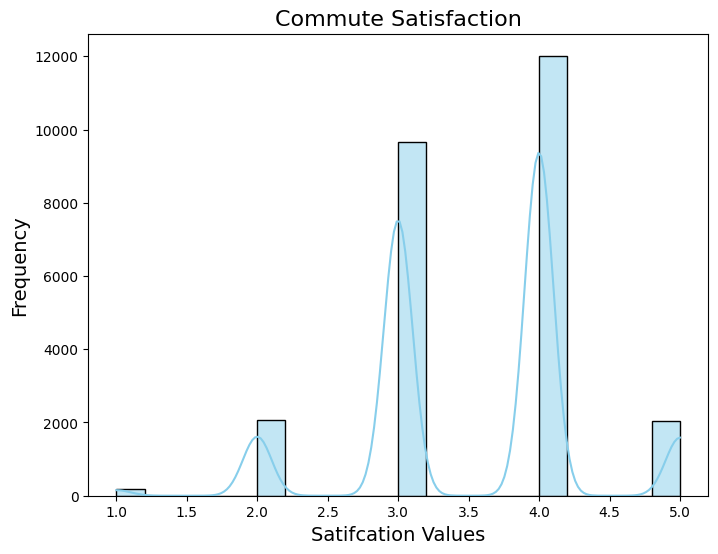

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Q17D'].dropna(), bins=20, kde=True, color='skyblue')
plt.xlabel('Satifcation Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Commute Satisfaction', fontsize=16)
plt.show()


In [ ]:
sample_size = len(df)
sample_size = df.shape[0]

print(f"Sample size: {sample_size}")

Sample size: 25955


Text(0, 0.5, 'satisfaction')

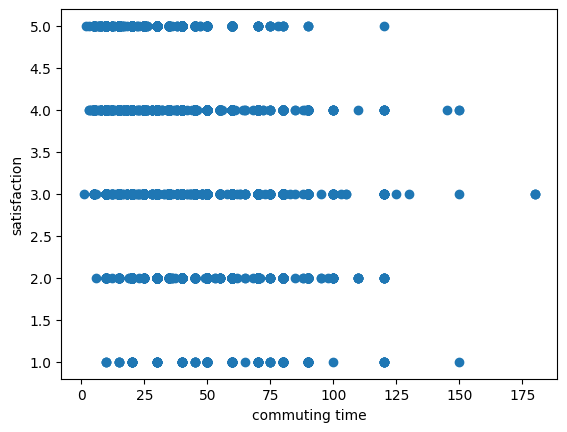

In [ ]:
plt.scatter(df["time"], df['Q17D'], label='Data Points')
plt.xlabel('commuting time')
plt.ylabel('satisfaction')

In [ ]:
count = df[df['Q17'] == 1].shape[0]
print(count)


1562


In [ ]:
df['student_commute'] = df['Q17'] == 1

In [ ]:
# 스피어만
import pandas as pd
from scipy.stats import spearmanr

correlation, p_value = spearmanr(df['Q17D'], df['time'])
print(f"Spearman Correlation: {correlation}, p-value: {p_value}")


Spearman Correlation: -0.2905117485581306, p-value: 0.0


In [ ]:
from scipy.stats import shapiro

for satisfaction_level in range(1, 6):
    group = df.loc[df['Q17D'] == satisfaction_level, 'time']
    stat, p_value = shapiro(group)
    print(f"정규성 검사 - 만족도 {satisfaction_level}: p-value = {p_value:.5f}")

    if p_value > 0.05:
        print(f"  -> 만족도 {satisfaction_level} 그룹은 정규 분포를 따른다고 볼 수 있습니다.\n")
    else:
        print(f"  -> 만족도 {satisfaction_level} 그룹은 정규 분포를 따르지 않는다고 볼 수 있습니다.\n")


정규성 검사 - 만족도 1: p-value = 0.00010
  -> 만족도 1 그룹은 정규 분포를 따르지 않는다고 볼 수 있습니다.

정규성 검사 - 만족도 2: p-value = 0.00000
  -> 만족도 2 그룹은 정규 분포를 따르지 않는다고 볼 수 있습니다.

정규성 검사 - 만족도 3: p-value = 0.00000
  -> 만족도 3 그룹은 정규 분포를 따르지 않는다고 볼 수 있습니다.

정규성 검사 - 만족도 4: p-value = 0.00000
  -> 만족도 4 그룹은 정규 분포를 따르지 않는다고 볼 수 있습니다.

정규성 검사 - 만족도 5: p-value = 0.00000
  -> 만족도 5 그룹은 정규 분포를 따르지 않는다고 볼 수 있습니다.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9647.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12015.
  res = hypotest_fun_out(*samples, **kwds)


Kruskal-Wallis Test: Statistics=346.3820487590719, p-value=0.000


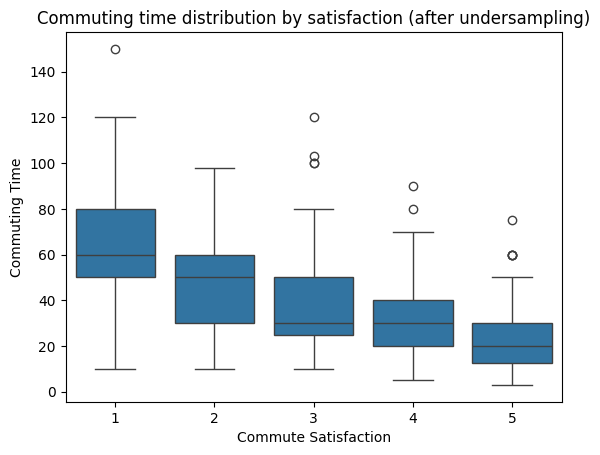

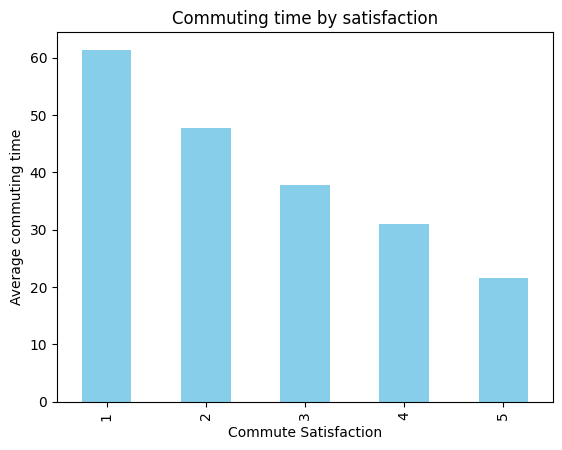

In [ ]:
import pandas as pd
from sklearn.utils import resample
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

groups = [df.loc[df['Q17D'] == i, 'time'] for i in range(1, 6)]
group_sizes = [len(group) for group in groups]

min_size = min(group_sizes)
balanced_groups = []

for group in groups:
    if len(group) > min_size:
        group = resample(group, replace=False, n_samples=min_size, random_state=42)  # 언더샘플링
    balanced_groups.append(group)

stat, p_value = kruskal(*balanced_groups)
print(f"Kruskal-Wallis Test: Statistics={stat}, p-value={p_value:.3f}")

balanced_df = pd.DataFrame({'time': [item for group in balanced_groups for item in group],
                            'Q17D': [i for i, group in enumerate(balanced_groups, 1) for _ in group]})

sns.boxplot(x="Q17D", y="time", data=balanced_df)
plt.title("Commuting time distribution by satisfaction (after undersampling)")
plt.xlabel("Commute Satisfaction")
plt.ylabel("Commuting Time")
plt.show()

group_means_balanced = balanced_df.groupby('Q17D')['time'].mean()
group_means_balanced.plot(kind='bar', color='skyblue')
plt.xlabel("Commute Satisfaction")
plt.ylabel("Average commuting time")
plt.title("Commuting time by satisfaction")
plt.show()


In [ ]:
# 샘플 크기 확인
sample_size = len(df)
sample_size = df.shape[0]

print(f"Sample size: {sample_size}")

Sample size: 25955


Q17D
1    194
2    194
3    194
4    194
5    194
Name: count, dtype: int64


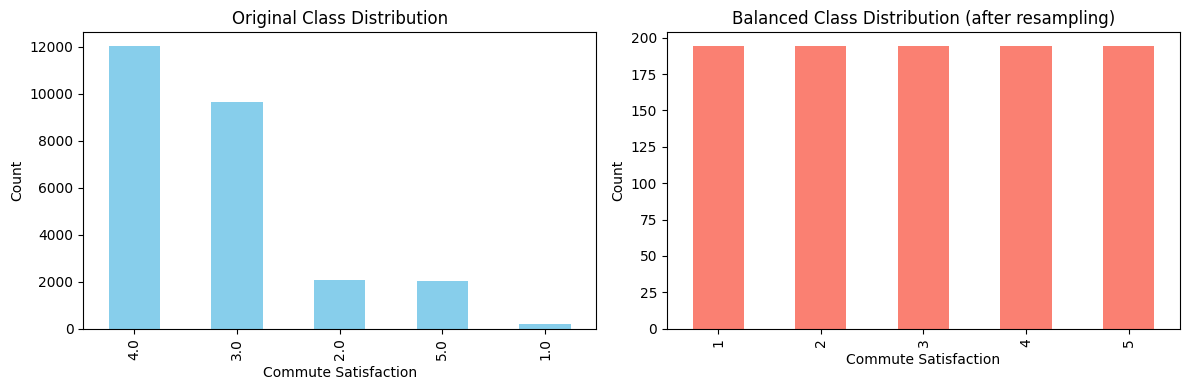

In [ ]:
class_counts = df['Q17D'].value_counts()
balanced_class_counts = pd.DataFrame({'Q17D': [i for i, group in enumerate(balanced_groups, 1) for _ in group]})
balanced_class_counts = balanced_class_counts['Q17D'].value_counts()
print(balanced_class_counts)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
class_counts.plot(kind='bar', color='skyblue')
plt.title('Original Class Distribution')
plt.xlabel('Commute Satisfaction')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
balanced_class_counts.plot(kind='bar', color='salmon')
plt.title('Balanced Class Distribution (after resampling)')
plt.xlabel('Commute Satisfaction')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# 샘플 크기 확인
sample_size = len(df)
sample_size = df.shape[0]

print(f"Sample size: {sample_size}")

Sample size: 25955
